In [1]:
import os
from cornac.models import MostPop, UserKNN, ItemKNN, MF, PMF, BPR, NeuMF, WMF, HPF, CVAE, VAECF, NMF
from cornac.metrics import Precision, Recall, NDCG, AUC, MAP, FMeasure, MRR

from experiment import Experiment
from extension_proportional import ExtensionProportional

Directory 'datasets/Gowalla' is exist.
Gowalla: The train, tune, and test sets downloaded.
Directory 'user_groups/Gowalla/005' is exist.


File ‘datasets/Gowalla/Gowalla_train.txt’ already there; not retrieving.

File ‘datasets/Gowalla/Gowalla_test.txt’ already there; not retrieving.

File ‘datasets/Gowalla/Gowalla_tune.txt’ already there; not retrieving.

--2023-06-19 14:28:50--  https://raw.githubusercontent.com/rahmanidashti/CPFairRecSys/main/datasets/Gowalla/groups/users/005/active_ids.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213 [text/plain]
Saving to: ‘user_groups/Gowalla/005/active_ids.txt.42’

     0K                                                       100% 3,38M=0s

2023-06-19 14:28:51 (3,38 MB/s) - ‘user_groups/Gowalla/005/active_ids.txt.42’ saved [213/213]

--2023-06-19 14:28:51--  https://raw.githubusercontent.com/rahmanidashti/CPFairRecSys/main/datasets

Gowalla: User groups on '005' downloaded.
Directory 'item_groups/Gowalla/020' is exist.
Gowalla: Item groups on '020' downloaded.
Datasets: Gowalla
rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 1130
Number of items = 1189
Number of ratings = 46371
Max rating = 215.0
Min rating = 1.0
Global mean = 1.8
---
Test data:
Number of users = 1130
Number of items = 1188
Number of ratings = 13249
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 1130
Total items = 1189

[WMF] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[WMF] Evaluation started!


Ranking:   0%|          | 0/1130 [00:00<?, ?it/s]


TEST:
...
    |    AUC |    MAP |    MRR | NDCG@10 | Recall@10 | Train (s) | Test (s)
--- + ------ + ------ + ------ + ------- + --------- + --------- + --------
WMF | 0.7656 | 0.0424 | 0.1004 |  0.0373 |    0.0382 |    5.5962 |   1.4519

ActiveU: 56,                       InActive: 1074,                         All: 1130
No. of Shorthead Items: 238                           and No. of Longtaill Items: 951
> Model: WMF
WMF


  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

Runing fairness optimisation on 'CP', 0.05, 0.05
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2384212
Academic license - for non-commercial use only - registered to timvnb@gmail.com
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD Ryzen 7 4800U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license - for non-commercial use only - registered to timvnb@gmail.com
Optimize a model with 62158 rows, 61028 columns and 208947 nonzeros
Model fingerprint: 0x51e1ada2
Coefficient statistics:
  Matrix range     [5e-03, 1e+00]
  Objective range  [7e-06, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range 

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/1074 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

IndexError: index 1 is out of bounds for axis 0 with size 1

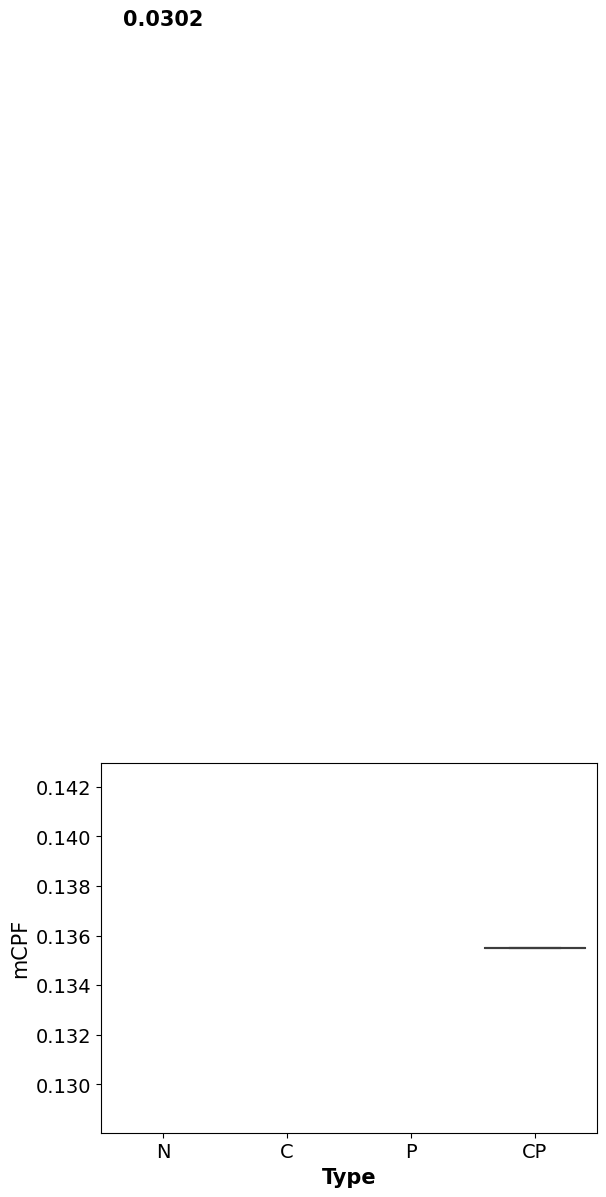

In [2]:
experiment = Experiment(
    os.getcwd() + '/table_reproduction.yaml',
    models=[
            # HPF(k=50, seed=123, hierarchical=False, name="PF"),
            WMF(k=50, max_iter=50, learning_rate=0.001, lambda_u=0.01, lambda_v=0.01, verbose=True, seed=123),
            # NeuMF(num_factors=9, layers=[32, 16, 8], act_fn="tanh", num_epochs=5, num_neg=3, batch_size=256, lr=0.001, seed=43, verbose=True),
            # VAECF(k=10, autoencoder_structure=[20], act_fn="tanh", likelihood="mult", n_epochs=100, batch_size=100, learning_rate=0.001, beta=1.0, seed=123, use_gpu=True, verbose=True)
        ],
        metrics=[
            AUC(), MAP(), MRR(), NDCG(k=10), Recall(k=10)
        ]
    )
experiment.run_experiment()

In [ ]:
experiment = ExtensionProportional(
    os.getcwd() + '/table_reproduction.yaml',
    models=[
            HPF(k=50, seed=123, hierarchical=False, name="PF"),
            WMF(k=50, max_iter=50, learning_rate=0.001, lambda_u=0.01, lambda_v=0.01, verbose=True, seed=123),
            NeuMF(num_factors=9, layers=[32, 16, 8], act_fn="tanh", num_epochs=5, num_neg=3, batch_size=256, lr=0.001, seed=43, verbose=True),
            VAECF(k=10, autoencoder_structure=[20], act_fn="tanh", likelihood="mult", n_epochs=100, batch_size=100, learning_rate=0.001, beta=1.0, seed=123, use_gpu=True, verbose=True)
        ],
        metrics=[
            AUC(), MAP(), MRR(), NDCG(k=10), Recall(k=10)
        ]
    )
experiment.run_experiment()

In [20]:
import numpy as np


idcg = 0
for k in range(1, 12):
    idcg += 1 / np.log(k + 1)

idcg

6.9574001294266425